#Introduction

AI-generated texts have a wide range of use cases across various industries and domains such as; Content Generation, Personalized Marketing, Virtual Assistants and Chatbots:, Creative Writing and Storytelling, and more. While AI-generated texts offer many benefits and applications, there are also some inherent risks that need to be considered.

We want to tackle these complex issues by identifying the AI-generated texts using the machine learning algorithm. Your task is to develop an algorithm to classify AI-generated text from human-generated texts.

# Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19



In [ ]:
!gdown 1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb

Downloading...
From: https://drive.google.com/uc?id=1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb
To: /content/6e2834d6-96ff-4d56-b01f-5f343e65e516.xlsx
100% 15.3M/15.3M [00:00<00:00, 41.5MB/s]


In [ ]:
import pandas as pd
# https://drive.google.com/file/d/1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas/view?usp=sharing
!gdown 1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas

Downloading...
From: https://drive.google.com/uc?id=1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 176MB/s]


In [ ]:
# unzip it
!unzip ai-text-competition-data.zip

# # read it
# df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


# Read-in Data

In [ ]:
# read train and test datasets
tg = pd.read_csv('/content/ai-text-competition/training_set.csv')

Just use the `training_set.csv` file - we are ignoring the `test_set.csv` since it does not have labels.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import json
import numpy as np

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import keras
from keras import layers
from keras import initializers
import plotly.express as px
from sklearn.inspection import permutation_importance
keras.__version__
keras.utils.set_random_seed(42) # set seed for deep learning model

In [ ]:
print(tg.shape)
tg.head(5)

(11144, 772)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


#📆1.Exploratory Data Analysis (20 pts)

### Table1 - Unique values in column ind

In [ ]:
unique_values = tg['ind'].value_counts()
unique_values
#imbalance data

0    10044
1     1100
Name: ind, dtype: int64

### Table2 - summary of col word_count and punc_num

In [ ]:
#looking into the varibales that are not document embedding
col = tg[['word_count','punc_num']]
col.describe()

,word_count,punc_num
count,11144.000000,11144.000000
mean,29.978643,7.347003
std,10.271548,4.041350
min,5.000000,0.000000
25%,22.000000,4.000000
50%,30.000000,7.000000
75%,38.000000,10.000000
max,57.000000,27.000000


### Table3 - Text count generated by Human(0) vs AI (1)

In [ ]:
# create target col
tg['ind'].value_counts()
print()
tg['ind'].value_counts(normalize=True)

0    0.901292
1    0.098708
Name: ind, dtype: float64

### Table4 - Sorted word count by descending order

In [ ]:
tg['word_count'].sort_values(ascending = False)

1612     57
6135     57
449      56
1868     56
919      56
         ..
9245      7
6921      7
3319      5
10810     5
8469      5
Name: word_count, Length: 11144, dtype: int64

### Table5 - check missing value

In [ ]:
# check missing value
missing  = tg.isna().sum()

In [ ]:
# make missing value a dataframe and count the number of NA
missing = pd.DataFrame(missing)
missing.describe()

,0
count,772.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
# double check
tg.shape

(11144, 772)

In [ ]:
# Check the distribution of values in "ind"
tg["ind"].value_counts(normalize=True)

0    0.901292
1    0.098708
Name: ind, dtype: float64

In [ ]:
# Exclude document embeddings columns and see the statistics
df_no_text = tg[["ID", "word_count", "punc_num", "ind"]]
df_no_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          11144 non-null  int64
 1   word_count  11144 non-null  int64
 2   punc_num    11144 non-null  int64
 3   ind         11144 non-null  int64
dtypes: int64(4)
memory usage: 348.4 KB


In [ ]:
# Check if there's any difference between AI generated document and human generated document.

# word count
ai_text_word_count = df_no_text.loc[tg["ind"] == 1, ["word_count"]]
human_text_word_count = df_no_text.loc[tg["ind"] == 0, ["word_count"]]

stats_word_count = pd.concat([ai_text_word_count, human_text_word_count], axis=1)
stats_word_count.columns = ["AI", "Human"]
stats_word_count

,AI,Human
7,14.0,NaN
16,23.0,NaN
27,26.0,NaN
31,28.0,NaN
51,25.0,NaN
...,...,...
11138,NaN,35.0
11139,NaN,15.0
11141,NaN,12.0
11142,NaN,30.0


In [ ]:
# punctuation count
ai_text_punc_count = df_no_text.loc[tg["ind"] == 1, ["punc_num"]]
human_text_punc_count = df_no_text.loc[tg["ind"] == 0, ["punc_num"]]
stats_punc_count = pd.concat([ai_text_punc_count, human_text_punc_count], axis=1)
stats_punc_count.columns = ["AI", "Human"]
stats_punc_count

,AI,Human
7,1.0,NaN
16,1.0,NaN
27,1.0,NaN
31,5.0,NaN
51,5.0,NaN
...,...,...
11138,NaN,10.0
11139,NaN,2.0
11141,NaN,5.0
11142,NaN,7.0


### Plot1-2 Word count AI vs Human, Punc number AI vs Human

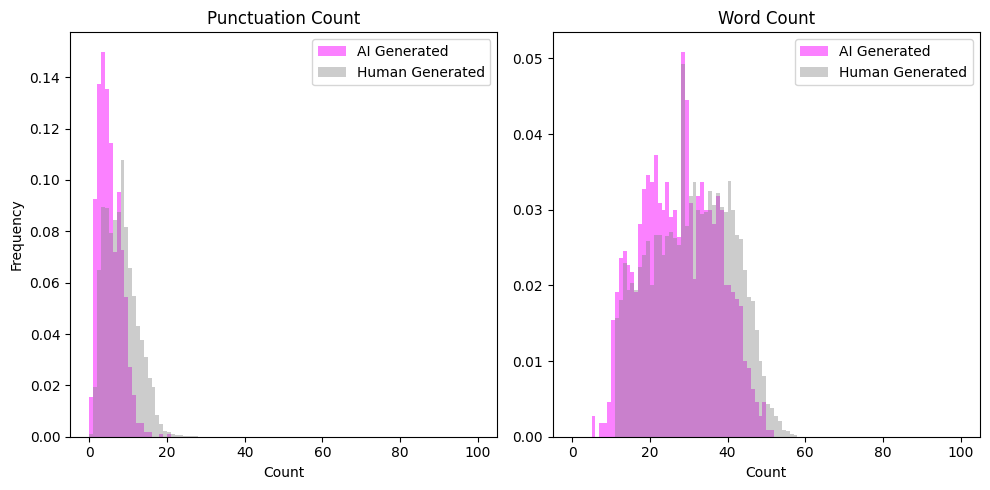

In [ ]:
import matplotlib.pyplot as plt

# Percentage plot side by side
num_bins = 100
range_val = (0, 100)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].hist(
    ai_text_punc_count,
    bins=num_bins,
    range=range_val,
    alpha=0.8,
    color="#FA62FF",
    edgecolor="None",
    density=True,
    label="AI Generated",
)
axs[0].hist(
    human_text_punc_count,
    bins=num_bins,
    range=range_val,
    alpha=0.4,
    color="grey",
    edgecolor="None",
    density=True,
    label="Human Generated",
)
axs[1].hist(
    ai_text_word_count,
    bins=num_bins,
    range=range_val,
    alpha=0.8,
    color="#FA62FF",
    edgecolor="None",
    density=True,
    label="AI Generated",
)
axs[1].hist(
    human_text_word_count,
    bins=num_bins,
    range=range_val,
    alpha=0.4,
    color="grey",
    edgecolor="None",
    density=True,
    label="Human Generated",
)
# axs[0].set_facecolor('#96FFFF')
# axs[1].set_facecolor('#96FFFF')
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Punctuation Count")
axs[0].legend(loc="upper right")
axs[1].set_xlabel("Count")
# axs[1].set_ylabel('Frequency')
axs[1].set_title("Word Count")
axs[1].legend(loc="upper right")
axs[0].grid(False)
axs[1].grid(False)
plt.tight_layout()

## Plot3 Word Count Box plot

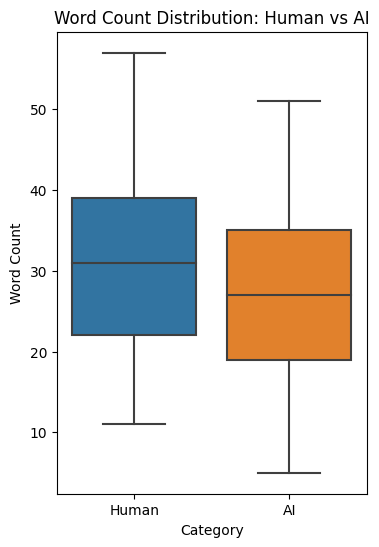

In [ ]:
# box plot to eyeball distribution of word count over Human vs AI
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported numpy as np and defined df
bins = np.linspace(0, 200, 40)

plt.figure(figsize=(4,6 ))

# Create a box plot
sns.boxplot(x='ind', y='word_count', data=tg, showfliers=True)  # Set showfliers to True if you want to include outliers

plt.xlabel("Category")
plt.ylabel("Word Count")
plt.title("Word Count Distribution: Human vs AI")
plt.xticks([0, 1], ['Human', 'AI'])  # Set x-axis labels
plt.show()

###Plot4 Punc Number Box Plot

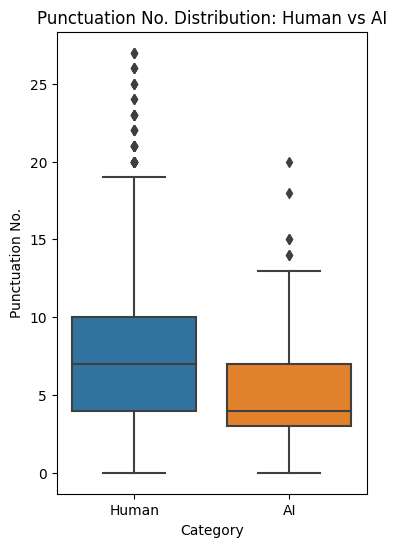

In [ ]:
# box plot to eyeball distribution of Punctuation count over Human vs AI
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported numpy as np and defined df
bins = np.linspace(0, 200, 40)

plt.figure(figsize=(4,6 ))

# Create a box plot
sns.boxplot(x='ind', y='punc_num', data=tg, showfliers=True)  # Set showfliers to True include outliers

plt.xlabel("Category")
plt.ylabel("Punctuation No.")
plt.title("Punctuation No. Distribution: Human vs AI")
plt.xticks([0, 1], ['Human', 'AI'])  # Set x-axis labels
plt.show()

### Plot5 ind bar chart

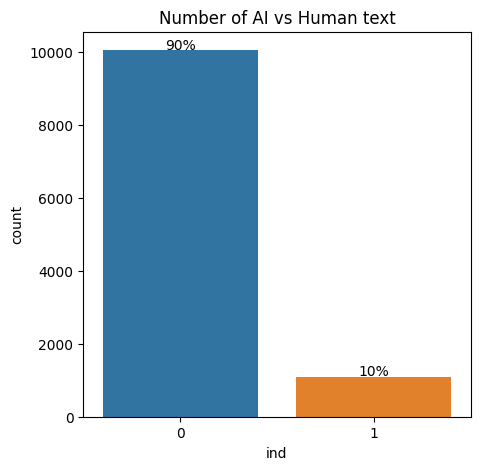

In [ ]:
# check target variable bar chart, it is very imbalanced
total = len(tg)
plt.figure(figsize = (5, 5))
plt.title("Number of AI vs Human text")
ax = sns.countplot(x = tg['ind'], data = tg)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    xaxis = p.get_x() + p.get_width() / 2
    yaxis = p.get_height() + 20
    ax.annotate(percentage, (xaxis, yaxis), ha = 'center')
plt.show()
#this is a imbalanced data, human: 90%, AI:10%

#⛽ 2. Prepare Data for Modeling (20 pts)

###2.1 Add Sum column and Product column

In [ ]:
# create product column with the product of each feature

# Specify the range of columns to multiply
prefix = 'feature_'
end_feature = 767  # feature number = 767

tg['features_product'] = 1

# Iterate over the range of columns and multiply the values
for i in range(1, end_feature+1):
    column_name = f'{prefix}{i}'
    tg['features_product'] *= tg[column_name]

tg['features_product'].head()


0     0.000000e+00
1    3.789059e-291
2    -0.000000e+00
3    5.773924e-250
4     0.000000e+00
Name: features_product, dtype: float64

In [ ]:
# create product column with the product of each feature

# Specify the range of columns to multiply
prefix = 'feature_'
end_feature = 767   # feature number = 767

tg['features_sum'] = 0 # starts from 0

# Iterate over the range of columns and multiply the values
for i in range(1, end_feature+1):
    column_name = f'{prefix}{i}'
    tg['features_sum'] += tg[column_name]

tg['features_sum'].head()

0    60.102554
1    65.108897
2    61.949409
3    65.395335
4    55.791737
Name: features_sum, dtype: float64

##2.2 Train test split 90-10

In [ ]:
# drop ind from train and assign ind to y
X = tg.drop(['ind','ID'], axis = 1)
y = tg['ind']

X.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,features_product,features_sum
0,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,-1.161955,...,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0.000000e+00,60.102554
1,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,-1.157622,...,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,3.789059e-291,65.108897
2,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,-1.646261,...,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,-0.000000e+00,61.949409
3,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,-1.609315,...,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,5.773924e-250,65.395335
4,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,-1.745294,...,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0.000000e+00,55.791737
5,-0.145006,-0.634942,-1.078515,-1.159792,0.311079,-0.295670,0.604143,-0.208568,-0.086018,-1.541871,...,1.076430,0.991697,0.335132,0.255469,0.444453,-0.100856,26,6,0.000000e+00,62.278442
6,0.676406,-0.040211,-0.606236,-0.289983,-0.033247,-0.527731,-0.185719,0.029672,-0.049345,-1.204052,...,1.382703,0.388991,0.162853,0.407838,-0.159078,-0.540186,31,8,-0.000000e+00,61.870134
7,-0.624960,-0.435477,-0.522379,-0.053120,-0.317254,-0.112471,-0.273967,-0.683952,0.132532,-1.545249,...,0.062755,0.973341,-0.025976,0.275548,1.068583,0.010488,14,1,-1.148735e-298,65.059883
8,0.237723,0.339373,-0.223262,0.025875,-0.487638,-0.218674,0.454260,-0.089491,-0.158496,-1.193962,...,0.312228,-0.033510,-0.136209,0.774964,-0.295102,0.107759,35,10,-0.000000e+00,55.012290
9,0.378888,-0.235711,-0.861490,-0.533745,-1.451976,0.081863,-0.225619,-0.535170,0.540560,-2.929668,...,0.381576,-0.452006,0.328630,-0.062308,-0.482523,-0.240994,49,2,0.000000e+00,53.546312


In [ ]:
# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1, # 90/10 split for final project
                                                    stratify = y,  # Perform stratification since class is imbalanced
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(10029, 772) (1115, 772) (10029,) (1115,)


###2.3 Scale columns

In [ ]:
# Create StandardScaler
sds = StandardScaler() #standardscaler is less senstitive to outliers

# Specify columns to scale
cols_to_scale = ['word_count','punc_num','features_product','features_sum'] # only scale the non-feature columns

# Extract the specified columns
columns_data_train = X_train[cols_to_scale].values
columns_data_test = X_test[cols_to_scale].values

# Fit and transform for training data
X_train[cols_to_scale] = sds.fit_transform(columns_data_train)
X_test[cols_to_scale] = sds.transform(columns_data_test)


In [ ]:
# check work
print(X.shape)
print(y.shape)

(11144, 772)
(11144,)


###2.4 Over sampling minority class in imbalanced ind data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# example of random oversampling to balance the class distribution
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import warnings

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train))


Resampled class distribution: Counter({0: 9039, 1: 9039})


#🛫3. Models (20 pts)

In [ ]:
import keras
keras.__version__
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dropout, GRU, Conv1D, MaxPooling1D, Bidirectional, Dense

###3.1 Neural Network Model

In [ ]:
# build a model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(772,)))
# model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(0.2)) # 0.2 dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.18)) # 0.18 dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1)) # 0.1 dropout
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.15)) # 0.15 dropout
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               98944     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

### 3.2 Compile model

In [ ]:
# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

###3.3 Early stopping

In [ ]:
# early stopping callback
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max',
                                   patience=50, # I can change this value
                                   restore_best_weights=True)

### 3.4 store results

In [ ]:
# fit the model!
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es], # early stopping callbacks
                    epochs=1000, # set this to a big number
                    batch_size=55, # this is a hyperparameter
                    shuffle=True,
                    validation_split=0.2,# it's a best practice to shuffle data
                    verbose=1) # this prints the output as the model trains

Epoch 1/1000
329/329 [==============================] - 4s 7ms/step - loss: 0.4270 - accuracy: 0.7868 - val_loss: 0.2798 - val_accuracy: 0.8664
Epoch 2/1000
329/329 [==============================] - 2s 7ms/step - loss: 0.2730 - accuracy: 0.8816 - val_loss: 0.1868 - val_accuracy: 0.9291
Epoch 3/1000
329/329 [==============================] - 3s 9ms/step - loss: 0.2243 - accuracy: 0.9058 - val_loss: 0.2979 - val_accuracy: 0.8664
Epoch 4/1000
329/329 [==============================] - 2s 7ms/step - loss: 0.1882 - accuracy: 0.9239 - val_loss: 0.2247 - val_accuracy: 0.9112
Epoch 5/1000
329/329 [==============================] - 2s 6ms/step - loss: 0.1576 - accuracy: 0.9378 - val_loss: 0.2456 - val_accuracy: 0.9040
Epoch 6/1000
329/329 [==============================] - 2s 6ms/step - loss: 0.1469 - accuracy: 0.9416 - val_loss: 0.2236 - val_accuracy: 0.9238
Epoch 7/1000
329/329 [==============================] - 2s 6ms/step - loss: 0.1273 - accuracy: 0.9510 - val_loss: 0.2731 - val_accuracy:

#🆚 4. Evaluation (20 pts)

###4.1 Neural Network Accuracy curve

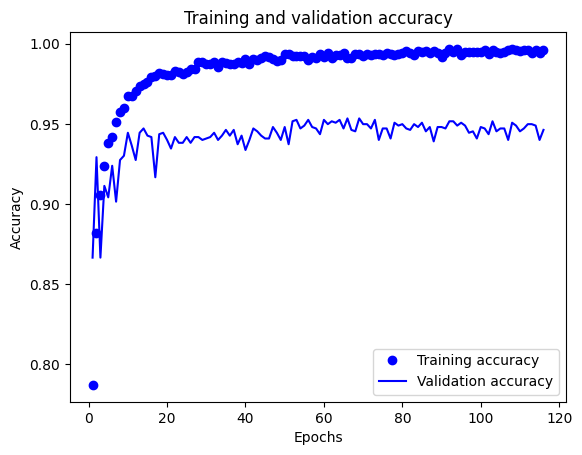

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###4.2 Neural Network Loss curve

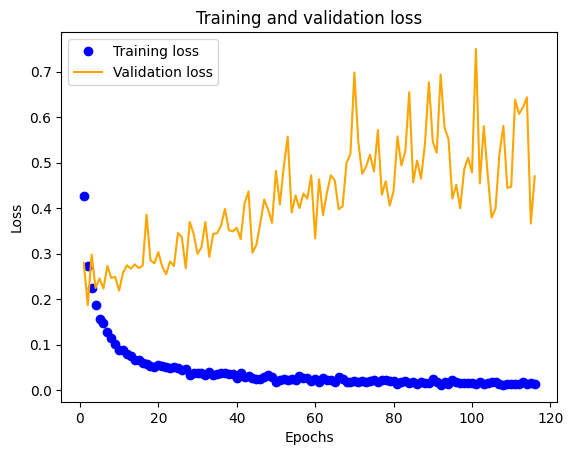

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4.3 Predict test and round to integer

In [ ]:
# these are numbers between 0 and 1
train_preds= model.predict(X_train)
test_preds= model.predict(X_test)

# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
test_preds = np.round(model.predict(X_test),0)
train_preds = np.round(model.predict(X_train),0)

565/565 [==============================] - 1s 2ms/step


###4.4 Neural Network Classification Report and Confusion Matrix

In [ ]:
# FNN evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# see accuracy score
print(accuracy_score(y_train, train_preds))
print(accuracy_score(y_test, test_preds))

# classification report
print("this is the classification report: \n", classification_report(y_train, train_preds))
print("this is the classification report: \n", classification_report(y_test, test_preds))

# confusion matrix
print("this is the confusion matrix: \n", confusion_matrix(y_train, train_preds))
print("this is the confusion matrix: \n", confusion_matrix(y_test, test_preds))

0.9994468414647638
0.9533632286995516
this is the classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9039
           1       1.00      1.00      1.00      9039

    accuracy                           1.00     18078
   macro avg       1.00      1.00      1.00     18078
weighted avg       1.00      1.00      1.00     18078

this is the classification report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1005
           1       0.82      0.67      0.74       110

    accuracy                           0.95      1115
   macro avg       0.89      0.83      0.86      1115
weighted avg       0.95      0.95      0.95      1115

this is the confusion matrix: 
 [[9031    8]
 [   2 9037]]
this is the confusion matrix: 
 [[989  16]
 [ 36  74]]


###4.5 Neural Network Permutation Feature Importance

In [ ]:
# Define a scoring function for binary classification
def scoring_function(model, X, y):
    predictions = np.round(model.predict(X),0)  # Assuming a classification model
    return accuracy_score(y, predictions)

# Perform permutation importance
rnn_importance = permutation_importance(
    model, X_test, y_test, scoring=scoring_function, n_repeats=2, random_state=42,
)

# Create a DataFrame with the results
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # Replace with your feature names
    'Importance': rnn_importance.importances_mean
})


35/35 [==============================] - 0s 4ms/step


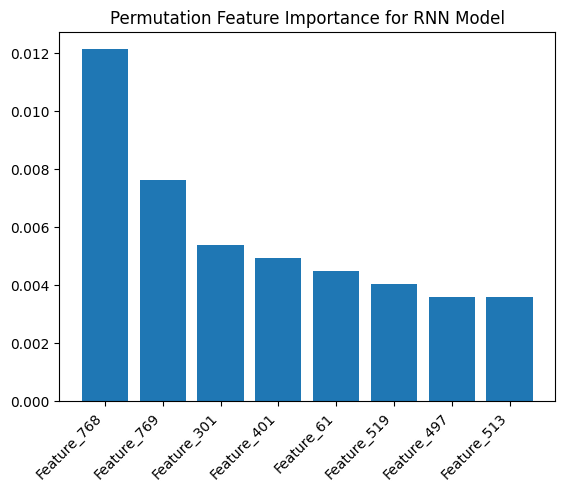

In [ ]:
# Get feature importances and names
feature_importances = rnn_importance.importances_mean
feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]  # Replace with your actual feature names

# Sort indices based on importance
sorted_indices = np.argsort(feature_importances)[::-1]  # argsort returns array in ascending order, [::=-1] reverses it to descending order

# Plot the permutation feature importance for the first 20 features
top_features = 8
plt.bar(range(top_features), feature_importances[sorted_indices][:top_features])
plt.xticks(range(top_features), np.array(feature_names)[sorted_indices][:top_features], rotation=45, ha='right')
plt.title('Permutation Feature Importance for RNN Model')
plt.show()

In [ ]:
# # all we need to do is decide on is n_steps (what our lookback period is)
# # since we have a bunch of data, why not n_steps=10? then try 30 later on.
n_steps = 5
raw_seq = np.array(X_transposed) #make sure your data is stored as a numpy array!
# let's ignore the date column and just use the temperature data
X, y = split_sequences(raw_seq, n_steps)

In [ ]:
# take a peak at what it did
print(X.shape)
print(y.shape)

# scroll up and make sure you understand this!
# y is a function of X (the previous n_steps observations!)

(769, 5, 11144)
(769, 11143)


In [ ]:
# we will use 90% of the data for train, and 10% for validation
train_pct_index = int(0.9 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# pretty slick way of splitting your data using slicing!
# notice how we didn't do any shuffling (we don't want temporal leakage! keeps time series intact)

In [ ]:
# check the shape to be sure
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(769, 5, 11144) (692, 5, 11144) (77, 5, 11144)
(769, 11143) (692, 11143) (77, 11143)


In [ ]:
n_steps = X_train.shape[1] # lookback
n_features = X_train.shape[2] # columns

print(n_steps, n_features)

5 11144


In [ ]:

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(n_steps,n_features))) # notice how input shape goes in first layer
model.add(MaxPooling1D(2))
model.add(SimpleRNN(30, activation='relu', recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
model.summary()

es = EarlyStopping(monitor='val_acc', mode='max',
                   patience=25,
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
model.fit(X_train, y_train,
          epochs=1000,
          batch_size=20,
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

#🔥We then work on original data without transpose again to run LSTM model:

In [ ]:
# Process data without transpose, drop ID concate ind to last col
X_lstm = tg.drop(['ID','ind'], axis = 1)
X_lstm['ind'] = tg['ind'] # concate ind to the last column

X_lstm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,features_product,features_sum,ind
0,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,-1.161955,...,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0.000000e+00,60.102554,0
1,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,-1.157622,...,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,3.789059e-291,65.108897,0
2,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,-1.646261,...,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,-0.000000e+00,61.949409,0
3,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,-1.609315,...,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,5.773924e-250,65.395335,0
4,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,-1.745294,...,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0.000000e+00,55.791737,0


In [ ]:
# prep data for modeling (multivariate)
# link: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# all we need to do is decide on is n_steps (what our lookback period is 5)
n_steps = 5
raw_seq = np.array(X_lstm) #make sure your data is stored as a numpy array!
# let's ignore the date column and just use the temperature data
X, y = split_sequences(raw_seq, n_steps)

In [ ]:
# take a peak at what it did
print(X.shape)
print(y.shape)

(11140, 5, 772)
(11140,)


In [ ]:
# we will use 90% of the data for train, and 10% for validation
train_pct_index = int(0.9 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# pretty slick way of splitting your data using slicing!

In [ ]:
# check the shape to be sure
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)


(11140, 5, 772) (10026, 5, 772) (1114, 5, 772)
(11140,) (10026,) (1114,)


In [ ]:
# note how there's a 2 at the end
# usually we did this for a multi-classification problem, but not today!
# by default, it's a 'linear' activiation function
# so this is 2 node output and we're doing regression.

n_steps = X_train.shape[1]
n_features = X_train.shape[2]

print(n_steps, n_features)

5 772


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu',
               recurrent_dropout=0.1,
               input_shape=(n_steps, n_features))))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.18)) # 0.18 dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1)) # 0.1 dropout
model.add(Dense(1, activation='sigmoid')) # since Y has three values, we need to predict three values
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = keras.callbacks.EarlyStopping(monitor='val_acc',
                                   mode='max',
                                   patience=25, # you can play with this!
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=800, # you can set this to a big number!
                    batch_size=40,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True)

Epoch 1/800
201/201 [==============================] - 24s 60ms/step - loss: 0.2983 - acc: 0.9022 - val_loss: 0.2078 - val_acc: 0.9267
Epoch 2/800
201/201 [==============================] - 10s 49ms/step - loss: 0.2289 - acc: 0.9253 - val_loss: 0.2088 - val_acc: 0.9182
Epoch 3/800
201/201 [==============================] - 7s 37ms/step - loss: 0.2034 - acc: 0.9315 - val_loss: 0.1819 - val_acc: 0.9437
Epoch 4/800
201/201 [==============================] - 10s 49ms/step - loss: 0.1821 - acc: 0.9379 - val_loss: 0.2214 - val_acc: 0.9192
Epoch 5/800
201/201 [==============================] - 9s 45ms/step - loss: 0.1753 - acc: 0.9405 - val_loss: 0.1739 - val_acc: 0.9407
Epoch 6/800
201/201 [==============================] - 8s 38ms/step - loss: 0.1626 - acc: 0.9448 - val_loss: 0.1683 - val_acc: 0.9457
Epoch 7/800
201/201 [==============================] - 10s 48ms/step - loss: 0.1527 - acc: 0.9480 - val_loss: 0.1602 - val_acc: 0.9437
Epoch 8/800
201/201 [==============================] - 7s 

In [ ]:
# these are numbers between 0 and 1
train_preds= model.predict(X_train)
test_preds= model.predict(X_test)

# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
test_preds = np.round(model.predict(X_test),0)
train_preds = np.round(model.predict(X_train),0)


314/314 [==============================] - 4s 12ms/step


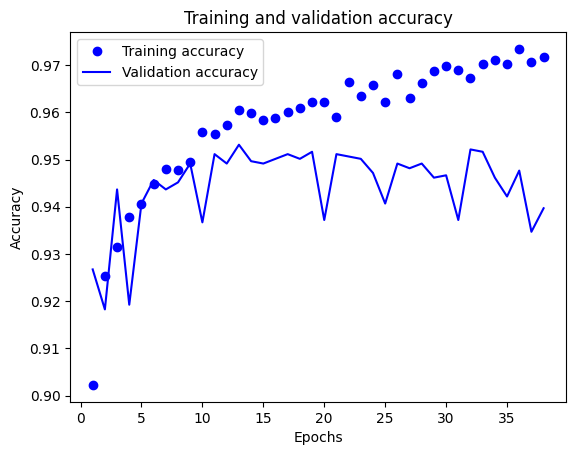

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

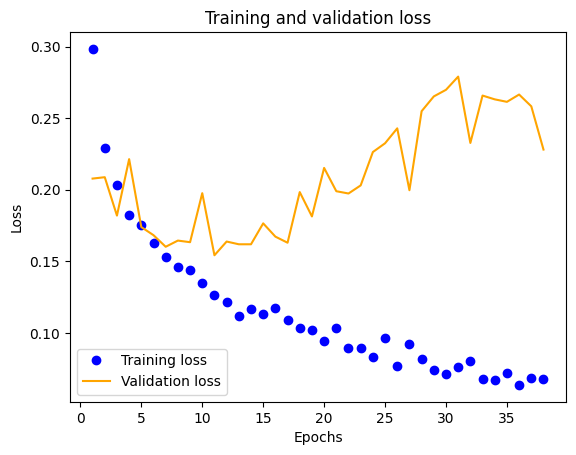

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# FNN evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# see accuracy score
print(accuracy_score(y_train, train_preds))
print(accuracy_score(y_test, test_preds))

# classification report
print("this is the classification report: \n", classification_report(y_train, train_preds))
print("this is the classification report: \n", classification_report(y_test, test_preds))

# confusion matrix
print("this is the confusion matrix: \n", confusion_matrix(y_train, train_preds))
print("this is the confusion matrix: \n", confusion_matrix(y_test, test_preds))

0.9652902453620587
0.9533213644524237
this is the classification report: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      9037
         1.0       0.91      0.72      0.80       989

    accuracy                           0.97     10026
   macro avg       0.94      0.85      0.89     10026
weighted avg       0.96      0.97      0.96     10026

this is the classification report: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1003
         1.0       0.86      0.63      0.73       111

    accuracy                           0.95      1114
   macro avg       0.91      0.81      0.85      1114
weighted avg       0.95      0.95      0.95      1114

this is the confusion matrix: 
 [[8970   67]
 [ 281  708]]
this is the confusion matrix: 
 [[992  11]
 [ 41  70]]


#  Analysis of Neural Network test classification report

1. Precision: Precision for class 0 is 0.96, and for class 1, it is 0.81. This indicates that 4% of the instances predicted as class 0 are false positives, and 19% of the instances predicted as class 1 are false positives.

2. Recall: Recall for class 0 is 0.98, and for class 1, it is 0.67. This indicates that 2% of actual instances of class 0 are false negatives, and 33% of actual instances of class 1 are false negatives.

3. F1-score: The F1-score is a balance between precision and recall. It is 0.97 for class 0 and 0.74 for class 1.

4. Accuracy: The overall accuracy is 0.95 (95%).

#Analysis of LSTM model test classification report

1. LSTM  did a pretty good job on test precision and recall, even precision is is 0.86 out performed a little over NN model by 4%. However, the recall is 4% lower than NN model. With a F1 score 0.73



Summary:
The first confusion matrix indicates perfect predictions with no false positives or false negatives.
The second confusion matrix shows some misclassifications, especially the recall in predicting class 1.

#💪 5. Discussion/Conclusion

* We started with a very imbalanced target variable, so we spent time to explore the methods that could address this nearly 90%-10% target variable.
Before we used SMOTE to oversample the minority class, we tried downsampling the majority class, but the result wasn't quite as expected. We also use stratify = target variable to ensure that the proportions of classes in the target variable y are maintained in both the training (y_train) and testing (y_test) sets.

* We scaled all the variables and find if there was a big different from scale only variables that are not document embedding, and then we found out that the result were not big different; moreover, the best F1 were the same.

  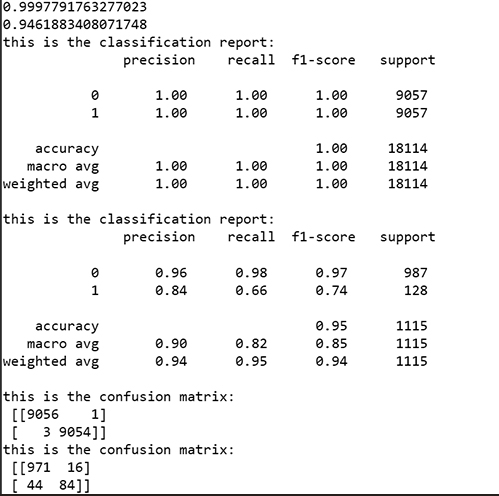


* We added K-Means, t-SNE（t-distributed Stochastic Neighbor Embedding, DBSCAN（Density-Based Spatial Clustering of Applications with Noise) in feature engineering, but we found that they did not improve the result; moreover, the best F1 on is 0.25 on test. As a result, it was better to delete them at the feature engineering part.


* We tried PCA to reduce dimentionality to 80%, 70%, 50%, 10% and the best F1 score reached 0.72 on test. On the other hand, the highest F1 score without PCA is 0.74. Therefore, we deemed neural network yields better result without PCA.

* We explored polynomial features with degree of 2 after implemeting PCA to reduce feature down to 50, but polynomial features increases the dimentionality up to 1440ish, it took way longer time to run, yet still didn't produce better result.

* We also tried LFDA(Local Fisher discriminant analysis) to reduce dimentionality to 80%, 70%, 50%, 10% and the best F1 score reached 0.62 on test. Therefore, we deemed neural network yields better result without LDA as well.

* We used flatten layer in the model but the accuracy declined. And we also used batchnormalization instead of dropout; however, the accuracy got worse, so we thought it was better to use the model without flatten layer.

* We also ran LSTM and SimpleRNN, but the result was terrible.

* As for the loss function, we used focal loss to replace binary_crossentropy, but the accuracy and the F1 score were not big different from the binary_crossentropy one.

* Thoughout our experimentation, the best precision on test is 0.87, yet the best recall never gets over 0.7. No matter how we tune the hyper parameter in the model, overfitting problem seemed to persist after 10-15 epochs. Validation loss keeps diverge from train loss as epochs goes.  

* Next step we would do is to run the data on matchine learning models and compare model performance with deep learning models and explore the possibility to concate machine learning model results to data and run dense model again.